<a href="https://colab.research.google.com/github/pea2/covid19_twitter/blob/master/v2_NAECON_cm_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports & Version Control -- Run

In [ ]:
# change current working directory to NLP/Project folder
from google.colab import drive 
drive.mount('/content/drive')
import os
%cd /content/drive/My\ Drive/Colab\ Notebooks/NAECON/
# upload my boat_loads_of_functions.py file on desktop Pycharm/NLP Project to Colab
# from google.colab import files
# files.upload()
import boat_loads_of_functions as fun
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from time import time
from sklearn.metrics import classification_report, confusion_matrix

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks/NAECON


In [ ]:
version = str(2)

# Analysis - bypass this section to next "LOAD TEST DATA"

## Read in test data for analysis

In [ ]:
pd.set_option('display.max_colwidth', None)

nb = pd.read_csv('v2 y_pred_nb_mul.csv')
# see column names
print(nb.columns)
# Renmae column names
nb = nb.rename(columns={'Unnamed: 0': 'Index', 'text':'Origianl Text', 'clean':'Normalized Text-NB',  'target':'Truth', 'nb_MN':'Prediction-NB'})
nb[:15]

Index(['Unnamed: 0', 'text', 'clean', 'target', 'nb_MN'], dtype='object')


,Index,Origianl Text,Normalized Text-NB,Truth,Prediction-NB
0,840769,"Amazing, many of this current &quot;cabinet&quot; appear to have believed that our Tax system is definitely voluntary",amazing many of this current quot cabinet quot appear to have believed that our tax system is definitely voluntary,1,1
1,1570248,Shower Times Be Right Back!!,shower times be right back,1,1
2,484798,"blasted internet is soooo slow due to this storm, everything is taking double time to load can't seem to access most of the pages !!!!",blasted internet is soo slow due to this storm everything is taking double time to load cannot seem to access most of the pages,0,0
3,686270,Well I have to go! play nicely all xxx,well have to go play nicely all xx,0,1
4,1310453,"just got home from the movies. UP was great!, so cute.",just got home from the movies up was great so cute,1,1
5,380811,@mattblissett im gutted really i am!,im gutted really am,0,0
6,235769,"In possible the most shaded train station ever, with an hour untill next train to brum",in possible the most shaded train station ever with an hour untill next train to brum,0,0
7,574668,"oh noes. Her pianist for leavers can't play cause its a break, her fingers are broken!!",oh noes her pianist for leavers cannot play cause its break her fingers are broken,0,0
8,1255917,@djtabone Nothing much. Just trying to get some expo in ATL going to school and about to re-release this EP as an LP. How are you?,nothing much just trying to get some expo in atl going to school and about to re release this ep as an lp how are you,1,1
9,861446,"@heidimontag i can't stop listening to all your new songs, especially 'more is more', i'm addicted!",cannot stop listening to all your new songs especially more is more am addicted,1,1


In [ ]:
logreg = pd.read_csv('v14 y_pred_logreg.csv')
# see column names
print(logreg.columns)
# Renmae column names
logreg = logreg.rename(columns={'normal':'Normalized Text-Logreg', 'logreg':'Prediction-Logreg'})
logreg.drop(['Unnamed: 0', 'text', 'clean', 'target'], axis=1, inplace=True)
logreg[:15]

Index(['Unnamed: 0', 'text', 'clean', 'normal', 'target', 'logreg'], dtype='object')


,Normalized Text-Logreg,Prediction-Logreg
0,amaz mani of thi current quot cabinet quot appear to have believ that our tax system is definit voluntari,1
1,shower time be right back,1
2,blast internet is soo slow due to thi storm everyth is take doubl time to load can not seem to access most of the page,0
3,well have to go play nice all xx,1
4,just got home from the movi up wa great so cute,1
5,im gut realli am,0
6,in possibl the most shade train station ever with an hour until next train to brum,1
7,oh noe her pianist for leaver can not play caus it break her finger are broken,0
8,noth much just tri to get some expo in atl go to school and about to re releas thi ep as an lp how are you,1
9,can not stop listen to all your new song especi more is more am addict,1


In [ ]:
svc = pd.read_csv('v18 y_pred_svc.csv')
# see column names
print(svc.columns)
# Rename column names
svc = svc.rename(columns={'normal':'Normalized Text-SVC', 'svc':'Prediction-SVC'})
svc.drop(['Unnamed: 0', 'text', 'clean', 'target'], axis=1, inplace=True)
svc[:15]

Index(['Unnamed: 0', 'text', 'clean', 'normal', 'target', 'svc'], dtype='object')


,Normalized Text-SVC,Prediction-SVC
0,amaz current quot cabinet quot appear believ tax definit voluntari,1
1,shower time right,1
2,blast internet soooo slow storm take doubl time load access page,0
3,play nice xxx,1
4,just got home movi great cute,1
5,im gut realli,0
6,possibl shade train station hour until train brum,0
7,oh no pianist leaver play caus break finger broken,0
8,just tri expo atl go school releas ep lp,1
9,stop listen new song especi addict,1


In [ ]:
text = nb.iloc[:, 0:3].join(logreg.iloc[:,0]).join(svc.iloc[:,0])
text[:15]

,Index,Origianl Text,Normalized Text-NB,Normalized Text-Logreg,Normalized Text-SVC
0,840769,"Amazing, many of this current &quot;cabinet&quot; appear to have believed that our Tax system is definitely voluntary",amazing many of this current quot cabinet quot appear to have believed that our tax system is definitely voluntary,amaz mani of thi current quot cabinet quot appear to have believ that our tax system is definit voluntari,amaz current quot cabinet quot appear believ tax definit voluntari
1,1570248,Shower Times Be Right Back!!,shower times be right back,shower time be right back,shower time right
2,484798,"blasted internet is soooo slow due to this storm, everything is taking double time to load can't seem to access most of the pages !!!!",blasted internet is soo slow due to this storm everything is taking double time to load cannot seem to access most of the pages,blast internet is soo slow due to thi storm everyth is take doubl time to load can not seem to access most of the page,blast internet soooo slow storm take doubl time load access page
3,686270,Well I have to go! play nicely all xxx,well have to go play nicely all xx,well have to go play nice all xx,play nice xxx
4,1310453,"just got home from the movies. UP was great!, so cute.",just got home from the movies up was great so cute,just got home from the movi up wa great so cute,just got home movi great cute
5,380811,@mattblissett im gutted really i am!,im gutted really am,im gut realli am,im gut realli
6,235769,"In possible the most shaded train station ever, with an hour untill next train to brum",in possible the most shaded train station ever with an hour untill next train to brum,in possibl the most shade train station ever with an hour until next train to brum,possibl shade train station hour until train brum
7,574668,"oh noes. Her pianist for leavers can't play cause its a break, her fingers are broken!!",oh noes her pianist for leavers cannot play cause its break her fingers are broken,oh noe her pianist for leaver can not play caus it break her finger are broken,oh no pianist leaver play caus break finger broken
8,1255917,@djtabone Nothing much. Just trying to get some expo in ATL going to school and about to re-release this EP as an LP. How are you?,nothing much just trying to get some expo in atl going to school and about to re release this ep as an lp how are you,noth much just tri to get some expo in atl go to school and about to re releas thi ep as an lp how are you,just tri expo atl go school releas ep lp
9,861446,"@heidimontag i can't stop listening to all your new songs, especially 'more is more', i'm addicted!",cannot stop listening to all your new songs especially more is more am addicted,can not stop listen to all your new song especi more is more am addict,stop listen new song especi addict


In [ ]:
pred = nb.iloc[:, 3:5].join(logreg.iloc[:,1]).join(svc.iloc[:,1])
pred[:15]

,Truth,Prediction-NB,Prediction-Logreg,Prediction-SVC
0,1,1,1,1
1,1,1,1,1
2,0,0,0,0
3,0,1,1,1
4,1,1,1,1
5,0,0,0,0
6,0,0,1,0
7,0,0,0,0
8,1,1,1,1
9,1,1,1,1


In [ ]:
data = text.join(pred)
data[:15]

,Index,Origianl Text,Normalized Text-NB,Normalized Text-Logreg,Normalized Text-SVC,Truth,Prediction-NB,Prediction-Logreg,Prediction-SVC
0,840769,"Amazing, many of this current &quot;cabinet&quot; appear to have believed that our Tax system is definitely voluntary",amazing many of this current quot cabinet quot appear to have believed that our tax system is definitely voluntary,amaz mani of thi current quot cabinet quot appear to have believ that our tax system is definit voluntari,amaz current quot cabinet quot appear believ tax definit voluntari,1,1,1,1
1,1570248,Shower Times Be Right Back!!,shower times be right back,shower time be right back,shower time right,1,1,1,1
2,484798,"blasted internet is soooo slow due to this storm, everything is taking double time to load can't seem to access most of the pages !!!!",blasted internet is soo slow due to this storm everything is taking double time to load cannot seem to access most of the pages,blast internet is soo slow due to thi storm everyth is take doubl time to load can not seem to access most of the page,blast internet soooo slow storm take doubl time load access page,0,0,0,0
3,686270,Well I have to go! play nicely all xxx,well have to go play nicely all xx,well have to go play nice all xx,play nice xxx,0,1,1,1
4,1310453,"just got home from the movies. UP was great!, so cute.",just got home from the movies up was great so cute,just got home from the movi up wa great so cute,just got home movi great cute,1,1,1,1
5,380811,@mattblissett im gutted really i am!,im gutted really am,im gut realli am,im gut realli,0,0,0,0
6,235769,"In possible the most shaded train station ever, with an hour untill next train to brum",in possible the most shaded train station ever with an hour untill next train to brum,in possibl the most shade train station ever with an hour until next train to brum,possibl shade train station hour until train brum,0,0,1,0
7,574668,"oh noes. Her pianist for leavers can't play cause its a break, her fingers are broken!!",oh noes her pianist for leavers cannot play cause its break her fingers are broken,oh noe her pianist for leaver can not play caus it break her finger are broken,oh no pianist leaver play caus break finger broken,0,0,0,0
8,1255917,@djtabone Nothing much. Just trying to get some expo in ATL going to school and about to re-release this EP as an LP. How are you?,nothing much just trying to get some expo in atl going to school and about to re release this ep as an lp how are you,noth much just tri to get some expo in atl go to school and about to re releas thi ep as an lp how are you,just tri expo atl go school releas ep lp,1,1,1,1
9,861446,"@heidimontag i can't stop listening to all your new songs, especially 'more is more', i'm addicted!",cannot stop listening to all your new songs especially more is more am addicted,can not stop listen to all your new song especi more is more am addict,stop listen new song especi addict,1,1,1,1


## Fusion Rules

In [ ]:
and_rule = (data['Prediction-NB']==1) & (data['Prediction-Logreg']==1) & (data['Prediction-SVC']==1)
or_rule = (data['Prediction-NB']==1) | (data['Prediction-Logreg']==1) | (data['Prediction-SVC']==1)
majority_rule = ( (data['Prediction-NB']==1) & (data['Prediction-Logreg']==1) ) |  ( (data['Prediction-NB']==1) & (data['Prediction-SVC']==1) ) | ( (data['Prediction-Logreg']==1) & (data['Prediction-SVC']==1) )
dominance_nb = (data['Prediction-NB']==1) | ( (data['Prediction-Logreg']==1) & (data['Prediction-SVC']==1) )
dominance_logreg = (data['Prediction-Logreg']==1) |  ( (data['Prediction-NB']==1) & (data['Prediction-SVC']==1) )
dominance_svc = (data['Prediction-SVC']==1) | ( (data['Prediction-NB']==1) & (data['Prediction-Logreg']==1) ) 

In [ ]:
data['AND'] = np.where(and_rule, 1, 0)
data['OR'] = np.where(or_rule, 1, 0)
data['Majority'] = np.where(majority_rule, 1, 0)
data['Dominance_NB'] = np.where(dominance_nb, 1, 0)
data['Dominance_Logreg'] = np.where(dominance_logreg, 1, 0)
data['Dominance_SVC'] = np.where(dominance_svc, 1, 0)

In [ ]:
data[:15]

,Index,Origianl Text,Normalized Text-NB,Normalized Text-Logreg,Normalized Text-SVC,Truth,Prediction-NB,Prediction-Logreg,Prediction-SVC,AND,OR,Majority,Dominance_NB,Dominance_Logreg,Dominance_SVC
0,840769,"Amazing, many of this current &quot;cabinet&quot; appear to have believed that our Tax system is definitely voluntary",amazing many of this current quot cabinet quot appear to have believed that our tax system is definitely voluntary,amaz mani of thi current quot cabinet quot appear to have believ that our tax system is definit voluntari,amaz current quot cabinet quot appear believ tax definit voluntari,1,1,1,1,1,1,1,1,1,1
1,1570248,Shower Times Be Right Back!!,shower times be right back,shower time be right back,shower time right,1,1,1,1,1,1,1,1,1,1
2,484798,"blasted internet is soooo slow due to this storm, everything is taking double time to load can't seem to access most of the pages !!!!",blasted internet is soo slow due to this storm everything is taking double time to load cannot seem to access most of the pages,blast internet is soo slow due to thi storm everyth is take doubl time to load can not seem to access most of the page,blast internet soooo slow storm take doubl time load access page,0,0,0,0,0,0,0,0,0,0
3,686270,Well I have to go! play nicely all xxx,well have to go play nicely all xx,well have to go play nice all xx,play nice xxx,0,1,1,1,1,1,1,1,1,1
4,1310453,"just got home from the movies. UP was great!, so cute.",just got home from the movies up was great so cute,just got home from the movi up wa great so cute,just got home movi great cute,1,1,1,1,1,1,1,1,1,1
5,380811,@mattblissett im gutted really i am!,im gutted really am,im gut realli am,im gut realli,0,0,0,0,0,0,0,0,0,0
6,235769,"In possible the most shaded train station ever, with an hour untill next train to brum",in possible the most shaded train station ever with an hour untill next train to brum,in possibl the most shade train station ever with an hour until next train to brum,possibl shade train station hour until train brum,0,0,1,0,0,1,0,0,1,0
7,574668,"oh noes. Her pianist for leavers can't play cause its a break, her fingers are broken!!",oh noes her pianist for leavers cannot play cause its break her fingers are broken,oh noe her pianist for leaver can not play caus it break her finger are broken,oh no pianist leaver play caus break finger broken,0,0,0,0,0,0,0,0,0,0
8,1255917,@djtabone Nothing much. Just trying to get some expo in ATL going to school and about to re-release this EP as an LP. How are you?,nothing much just trying to get some expo in atl going to school and about to re release this ep as an lp how are you,noth much just tri to get some expo in atl go to school and about to re releas thi ep as an lp how are you,just tri expo atl go school releas ep lp,1,1,1,1,1,1,1,1,1,1
9,861446,"@heidimontag i can't stop listening to all your new songs, especially 'more is more', i'm addicted!",cannot stop listening to all your new songs especially more is more am addicted,can not stop listen to all your new song especi more is more am addict,stop listen new song especi addict,1,1,1,1,1,1,1,1,1,1


## Accuracy Results

              precision    recall  f1-score   support

           0       0.77      0.80      0.79    160000
           1       0.79      0.76      0.78    160000

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



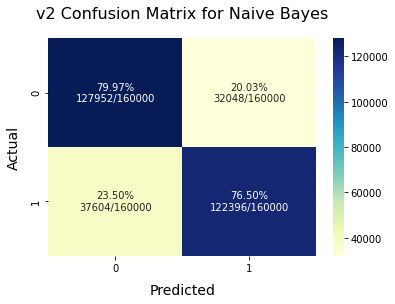

              precision    recall  f1-score   support

           0       0.81      0.79      0.80    160000
           1       0.79      0.81      0.80    160000

    accuracy                           0.80    320000
   macro avg       0.80      0.80      0.80    320000
weighted avg       0.80      0.80      0.80    320000



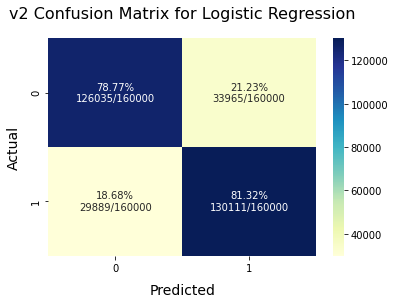

              precision    recall  f1-score   support

           0       0.78      0.74      0.76    160000
           1       0.75      0.79      0.77    160000

    accuracy                           0.77    320000
   macro avg       0.77      0.77      0.77    320000
weighted avg       0.77      0.77      0.77    320000



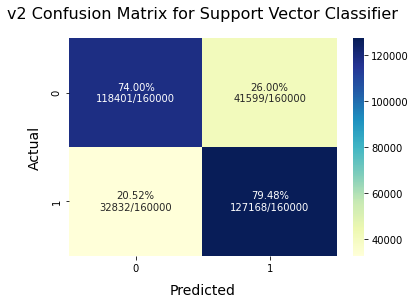

              precision    recall  f1-score   support

           0       0.74      0.87      0.80    160000
           1       0.84      0.70      0.76    160000

    accuracy                           0.78    320000
   macro avg       0.79      0.78      0.78    320000
weighted avg       0.79      0.78      0.78    320000



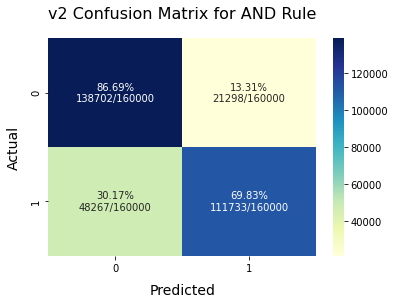

              precision    recall  f1-score   support

           0       0.84      0.67      0.75    160000
           1       0.73      0.87      0.79    160000

    accuracy                           0.77    320000
   macro avg       0.78      0.77      0.77    320000
weighted avg       0.78      0.77      0.77    320000



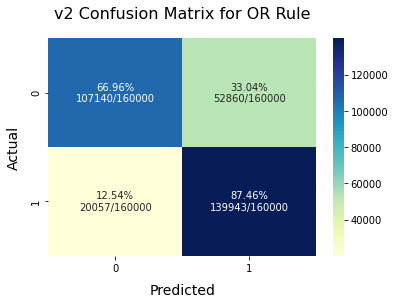

              precision    recall  f1-score   support

           0       0.80      0.79      0.79    160000
           1       0.79      0.80      0.80    160000

    accuracy                           0.80    320000
   macro avg       0.80      0.80      0.80    320000
weighted avg       0.80      0.80      0.80    320000



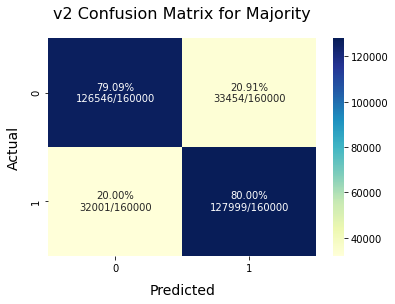

              precision    recall  f1-score   support

           0       0.81      0.77      0.79    160000
           1       0.78      0.81      0.80    160000

    accuracy                           0.79    320000
   macro avg       0.79      0.79      0.79    320000
weighted avg       0.79      0.79      0.79    320000



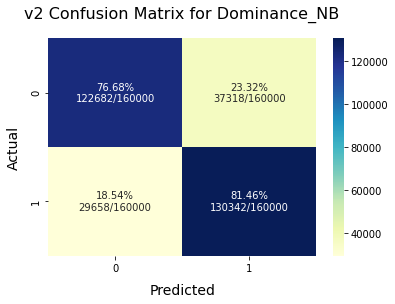

              precision    recall  f1-score   support

           0       0.82      0.77      0.79    160000
           1       0.78      0.83      0.80    160000

    accuracy                           0.80    320000
   macro avg       0.80      0.80      0.80    320000
weighted avg       0.80      0.80      0.80    320000



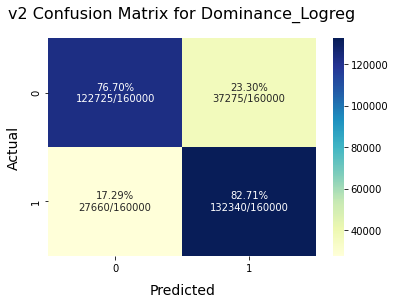

              precision    recall  f1-score   support

           0       0.81      0.72      0.76    160000
           1       0.75      0.83      0.79    160000

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.77    320000
weighted avg       0.78      0.78      0.77    320000



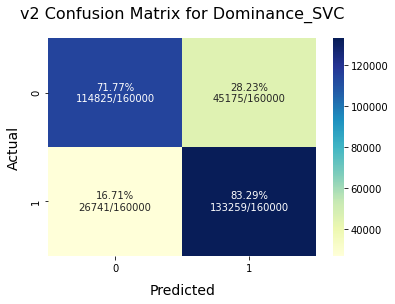

In [ ]:
# Individual 

title = 'Naive Bayes'
print(classification_report(data['Truth'],data['Prediction-NB'])) 
fun.plot_confusion_matrix(data['Truth'],data['Prediction-NB'], title, version)

title = 'Logistic Regression'
print(classification_report(data['Truth'],data['Prediction-Logreg'])) 
fun.plot_confusion_matrix(data['Truth'],data['Prediction-Logreg'], title, version)

title = 'Support Vector Classifier'
print(classification_report(data['Truth'],data['Prediction-SVC'])) 
fun.plot_confusion_matrix(data['Truth'],data['Prediction-SVC'], title, version)

# Fusion

title = 'AND Rule'
print(classification_report(data['Truth'],data['AND'])) 
fun.plot_confusion_matrix(data['Truth'],data['AND'], title, version)

title = 'OR Rule'
print(classification_report(data['Truth'],data['OR'])) 
fun.plot_confusion_matrix(data['Truth'],data['OR'], title, version)

title = 'Majority'
print(classification_report(data['Truth'],data['Majority'])) 
fun.plot_confusion_matrix(data['Truth'],data['Majority'], title, version)

title = 'Dominance_NB'
print(classification_report(data['Truth'],data['Dominance_NB'])) 
fun.plot_confusion_matrix(data['Truth'],data['Dominance_NB'], title, version)

title = 'Dominance_Logreg'
print(classification_report(data['Truth'],data['Dominance_Logreg'])) 
fun.plot_confusion_matrix(data['Truth'],data['Dominance_Logreg'], title, version)

title = 'Dominance_SVC'
print(classification_report(data['Truth'],data['Dominance_SVC'])) 
fun.plot_confusion_matrix(data['Truth'],data['Dominance_SVC'], title, version)


## Saving confusion matrix plot (new), classification report(same as v1), test data with text & predictions (same as v1) to .xlsx and pickle

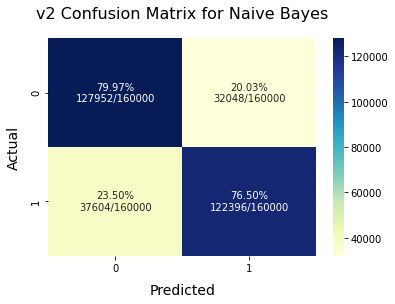

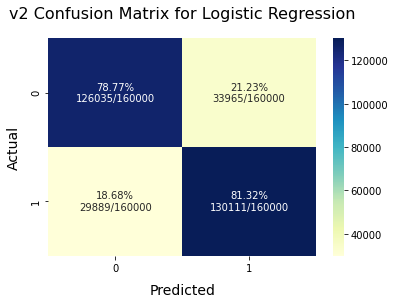

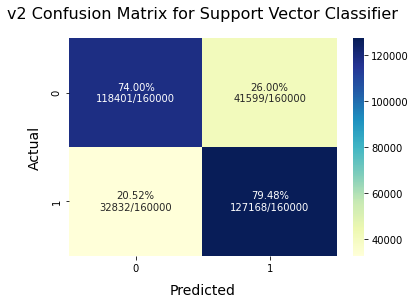

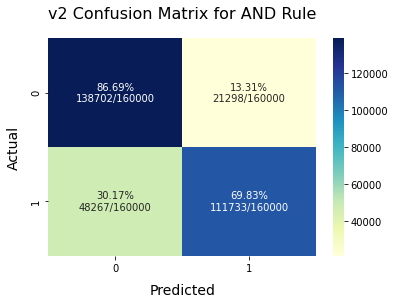

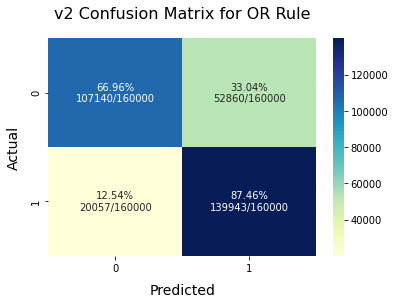

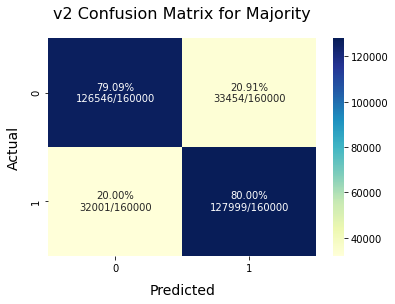

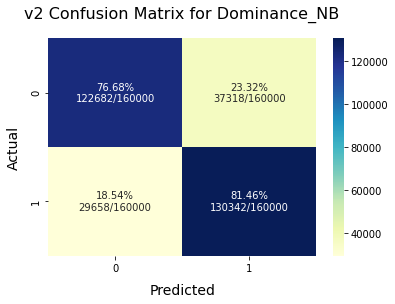

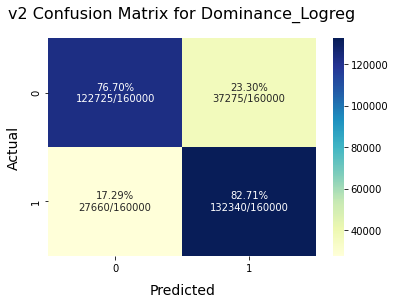

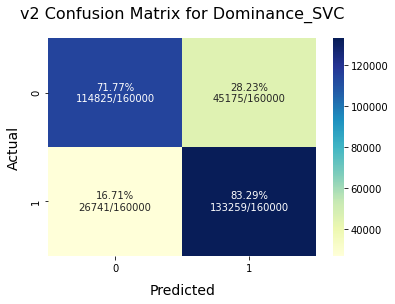

In [ ]:
# # save cm plot,  classification report is the same in v1 as in v2

# title = 'Naive Bayes'
# fun.save_classification_report(data['Truth'],data['Prediction-NB'], title, version)
# fun.save_confusion_matrix(data['Truth'],data['Prediction-NB'], title, version)

# title = 'Logistic Regression'
# fun.save_classification_report(data['Truth'],data['Prediction-Logreg'], title, version)
# fun.save_confusion_matrix(data['Truth'],data['Prediction-Logreg'], title, version)

# title = 'Support Vector Classifier'
# fun.save_classification_report(data['Truth'],data['Prediction-SVC'], title, version)
# fun.save_confusion_matrix(data['Truth'],data['Prediction-SVC'], title, version)

# title = 'AND Rule'
# fun.save_classification_report(data['Truth'],data['AND'], title, version)
# fun.save_confusion_matrix(data['Truth'],data['AND'], title, version)

# title = 'OR Rule'
# fun.save_classification_report(data['Truth'],data['OR'], title, version)
# fun.save_confusion_matrix(data['Truth'],data['OR'], title, version)

# title = 'Majority'
# fun.save_classification_report(data['Truth'],data['Majority'], title, version)
# fun.save_confusion_matrix(data['Truth'],data['Majority'], title, version)

# title = 'Dominance_NB'
# fun.save_classification_report(data['Truth'],data['Dominance_NB'], title, version)
# fun.save_confusion_matrix(data['Truth'],data['Dominance_NB'], title, version)

# title = 'Dominance_Logreg'
# fun.save_classification_report(data['Truth'],data['Dominance_Logreg'], title, version)
# fun.save_confusion_matrix(data['Truth'],data['Dominance_Logreg'], title, version)

# title = 'Dominance_SVC'
# fun.save_classification_report(data['Truth'],data['Dominance_SVC'], title, version)
# fun.save_confusion_matrix(data['Truth'],data['Dominance_SVC'], title, version)


# data with predictions v2 is the same as v1

# # # save to .xlsx
# data.to_excel("v%s data with predictions.xlsx" %version)

# # # save to pickle
# pickle.dump(data, open("v%s data with predictions.dat" %version, "wb"))

# # load pickle file
# data = pickle.load(open("v%s data with predictions.dat" %version, "rb"))


## Accuracy table (from sklearn classification reprot) saved in .xlsx -- same file name with the accuracy report generated from R.  Fail to save the accuracy plot

In [ ]:
# load classification report excel spreadsheet
title = ['Naive Bayes', 'Logistic Regression', 'Support Vector Classifier', 'AND Rule', 'OR Rule', 'Majority', 'Dominance_NB', 'Dominance_Logreg', 'Dominance_SVC']
cr_nb, cr_logreg, cr__svc, cr__and, cr__or, cr_majority, cr__dominance_nb, cr__dominance_logreg, cr__dominance_svc = (pd.read_excel('v%s classification report for %s.xlsx' %(version,ttl)) for ttl in title )

# extract the accuracy value (note accuracy is the same accross all columns, pick the first column which is under "Precision")
class_report = [cr_nb, cr_logreg, cr__svc, cr__and, cr__or, cr_majority, cr__dominance_nb, cr__dominance_logreg, cr__dominance_svc]
acc_nb, acc_logreg, acc_svc, acc_and, acc_or, acc_majority, acc_dominance_nb, acc_dominance_logreg, acc_dominance_svc = (cr.iloc[[2], [1]] for cr in class_report)

# put the accuracy in an array and reshape as a 1d array (instead of the original 3d)
aa = np.array([acc_nb, acc_logreg, acc_svc, acc_and, acc_or, acc_majority, acc_dominance_nb, acc_dominance_logreg, acc_dominance_svc])
acc = np.reshape(aa,9)
print(acc.shape) # (9,)
acc

(9,)


array([0.7823375 , 0.80045625, 0.76740312, 0.78260938, 0.77213438,
       0.79545312, 0.7907    , 0.79707812, 0.7752625 ])

In [ ]:
accuracy_table = pd.DataFrame({'Algorithm': title, 'Accuracy':acc})
# save accuracy table to .xlsx
accuracy_table.to_excel('v%s accuracy table.xlsx' % version)

# # load accuracy table
# accuracy_table = pd.read_excel('v%s accuracy table.xlsx' % version)
# # drop first column
# accuracy_table = accuracy_table.drop(['Unnamed: 0'], axis=1)
accuracy_table

,Algorithm,Accuracy
0,Naive Bayes,0.782338
1,Logistic Regression,0.800456
2,Support Vector Classifier,0.767403
3,AND Rule,0.782609
4,OR Rule,0.772134
5,Majority,0.795453
6,Dominance_NB,0.790700
7,Dominance_Logreg,0.797078
8,Dominance_SVC,0.775262


(0.75, 0.85)

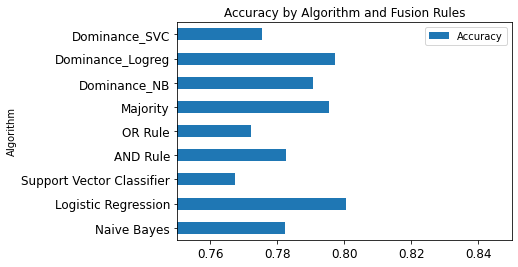

In [ ]:
accuracy_table.plot.barh(x='Algorithm', y='Accuracy', fontsize=12)
plt.title('Accuracy by Algorithm and Fusion Rules', fontdict={'size':16})
plt.xlim(0.76,0.82)
plt.ylabel('Algorithm', fontdict={'size':14})


In [ ]:
# try to save plot...
from natsort import index_natsorted
accuracy_table_sorted = accuracy_table.sort_values(
   by="Accuracy",
   key=lambda x: np.argsort(index_natsorted(accuracy_table["Accuracy"]))
)

ax = accuracy_table_sorted.plot.barh(x='Algorithm', y='Accuracy', fontsize=12)
plt.title('Predicting %s Accuracy by Algorithm and Fusion Rules' % category, fontdict={'size':16})
plt.xlim(0.76,0.82)
plt.ylabel('Algorithm', fontdict={'size':14})

# saving the plot as a .png image
# plt.savefig("v%s %s accuracy plot.png" %(version,category), orientation='landscape')  # didn't save right
fig.savefig("v%s %s accuracy plot.png" %(version,category), orientation='landscape', transparent=False, dpi=80, bbox_inches="tight")

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html

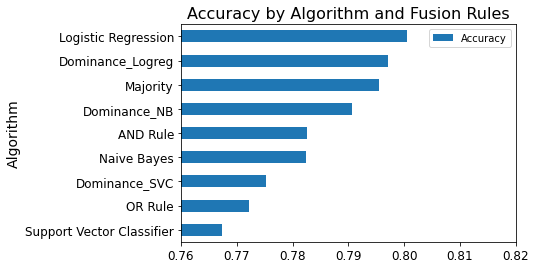

In [ ]:
from natsort import index_natsorted
accuracy_table_sorted = accuracy_table.sort_values(
   by="Accuracy",
   key=lambda x: np.argsort(index_natsorted(accuracy_table["Accuracy"]))
)

accuracy_table_sorted.plot.barh(x='Algorithm', y='Accuracy', fontsize=12)
plt.title('Predicting %s Accuracy by Algorithm and Fusion Rules' % category, fontdict={'size':16})
plt.xlim(0.76,0.82)
plt.ylabel('Algorithm', fontdict={'size':14})

# saving the plot as a .png image
plt.savefig("v%s %s accuracy plot.png" %(version,category), orientation='landscape')  # didn't save right

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html

# **# LOAD TEST DATA**

In [ ]:
# load pickle file
data = pickle.load(open("v%s data with predictions.dat" %version, "rb"))

In [ ]:
data

,Index,Origianl Text,Normalized Text-NB,Normalized Text-Logreg,Normalized Text-SVC,Truth,Prediction-NB,Prediction-Logreg,Prediction-SVC,AND,OR,Majority,Dominance_NB,Dominance_Logreg,Dominance_SVC
0,840769,"Amazing, many of this current &quot;cabinet&qu...",amazing many of this current quot cabinet quot...,amaz mani of thi current quot cabinet quot app...,amaz current quot cabinet quot appear believ t...,1,1,1,1,1,1,1,1,1,1
1,1570248,Shower Times Be Right Back!!,shower times be right back,shower time be right back,shower time right,1,1,1,1,1,1,1,1,1,1
2,484798,blasted internet is soooo slow due to this sto...,blasted internet is soo slow due to this storm...,blast internet is soo slow due to thi storm ev...,blast internet soooo slow storm take doubl tim...,0,0,0,0,0,0,0,0,0,0
3,686270,Well I have to go! play nicely all xxx,well have to go play nicely all xx,well have to go play nice all xx,play nice xxx,0,1,1,1,1,1,1,1,1,1
4,1310453,"just got home from the movies. UP was great!, ...",just got home from the movies up was great so ...,just got home from the movi up wa great so cute,just got home movi great cute,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319995,385935,Will be glad when I feel better.,will be glad when feel better,will be glad when feel better,glad feel better,0,1,1,1,1,1,1,1,1,1
319996,483279,my calf muscle is cramping,my calf muscle is cramping,my calf muscl is cramp,calf muscl cramp,0,0,0,0,0,0,0,0,0,0
319997,537144,@shawnemerriman aww poor thing. What did you ...,aww poor thing what did you have done take vic...,aww poor thing what did you have done take vic...,aww poor thing did vicodin knock,0,0,0,0,0,0,0,0,0,0
319998,679612,hopefully going shopping tomorrow. not feeling...,hopefully going shopping tomorrow not feeling ...,hope go shop tomorrow not feel so great tho ha...,hope go shop tomorrow feel great tho sick imag...,0,0,0,0,0,0,0,0,0,0


# Get confidence interval on accuracy & Youden's Index use Confusion Matrix values


## Make Confusion Matrix table (no version # for R to import) -- saved to .xlsx

In [ ]:
# put all 9 sets of tn, fp, fn, tp in a dataframe then save the dataframe to 
# .xlsx in an order tp, fp, fn, tn to match up the ThresholdRoc package diagnostic function

title = ['Naive Bayes', 'Logistic Regression', 'Support Vector Classifier', 'AND Rule', 'OR Rule', 'Majority', 'Dominance_NB', 'Dominance_Logreg', 'Dominance_SVC']
cm = pd.DataFrame(columns=['tn', 'fp', 'fn', 'tp'])
pred = [data['Prediction-NB'], data['Prediction-Logreg'], data['Prediction-SVC'],
        data['AND'], data['OR'], data['Majority'], 
        data['Dominance_NB'], data['Dominance_Logreg'], data['Dominance_SVC']]

# add new rows to the existing dataframe -- thanks to Lt Col Walkinson!!
for prediction in pred:
    tn, fp, fn, tp = confusion_matrix(data['Truth'], prediction).ravel()
    cm.loc[len(cm.index)] = [tn, fp, fn, tp]

# rename the index
cm = cm.set_axis(title, axis='index')

# switch column order
cm = pd.DataFrame(cm, columns=['tp', 'fp', 'fn', 'tn'])

# save to .xlsx for import in R finding confidence interval of accuracy
cm.to_excel('confusion matrix table.xlsx')

# # load confusion matrix table
# cm = pd.read_excel('confusion matrix table.xlsx')
cm

,tp,fp,fn,tn
Naive Bayes,122396,32048,37604,127952
Logistic Regression,130111,33965,29889,126035
Support Vector Classifier,127168,41599,32832,118401
AND Rule,111733,21298,48267,138702
OR Rule,139943,52860,20057,107140
Majority,127999,33454,32001,126546
Dominance_NB,130342,37318,29658,122682
Dominance_Logreg,132340,37275,27660,122725
Dominance_SVC,133259,45175,26741,114825


## Make Youden's Index table -- saved to .xlsx

### Loading the onput Youden Index tables from R code  -- method "exact"

In [ ]:
# load ThresohldRoc table excel sheet that has confidence interval for the accuracy and Youden's Index

diagnostic_method = 'exact'

file_name = [f"ThresholdRoc_{diagnostic_method}_nb.xlsx",
             f"ThresholdRoc_{diagnostic_method}_logreg.xlsx", 
             f"ThresholdRoc_{diagnostic_method}_svc.xlsx", 
             f"ThresholdRoc_{diagnostic_method}_and.xlsx",
             f"ThresholdRoc_{diagnostic_method}_or.xlsx", 
             f"ThresholdRoc_{diagnostic_method}_majority.xlsx",
             f"ThresholdRoc_{diagnostic_method}_dominance_nb.xlsx", 
             f"ThresholdRoc_{diagnostic_method}_dominance_logreg.xlsx",
             f"ThresholdRoc_{diagnostic_method}_dominance_svc.xlsx"]

# !!!! didn't specify the diagnostic method in the variable names (to avoid changing the later codes) !!!
thresohldRoc_nb =  pd.read_excel(file_name[0])
thresohldRoc_logreg = pd.read_excel(file_name[1])
thresohldRoc_svc = pd.read_excel(file_name[2])
thresohldRoc_and = pd.read_excel(file_name[3])
thresohldRoc_or = pd.read_excel(file_name[4])
thresohldRoc_majority = pd.read_excel(file_name[5])
thresohldRoc_dominance_nb = pd.read_excel(file_name[6])
thresohldRoc_dominance_logreg = pd.read_excel(file_name[7])
thresohldRoc_dominance_svc = pd.read_excel(file_name[8])

In [ ]:
thresohldRoc_logreg

,Unnamed: 0,Estim.,Low.lim.95..,Up.lim.95..
0,Sensitivity,0.8132,0.8113,0.8151
1,Specificity,0.7877,0.7857,0.7897
2,Pos.Pred.Val.,0.7930,0.7910,0.7950
3,Neg.Pred.Val.,0.8083,0.8063,0.8103
4,LR+,3.8307,3.7937,3.8682
5,LR-,0.2371,0.2347,0.2397
6,Odds ratio,16.1533,15.8752,16.4363
7,Youden index,0.6009,0.5981,0.6037
8,Accuracy,0.8005,0.7991,0.8018
9,Error rate,0.1995,0.1982,0.2009


### Make YI table with just the point estimate

In [ ]:
# extract youden's index from row 7 and column 1
thresohldRoc_table = [thresohldRoc_nb, thresohldRoc_logreg,thresohldRoc_svc,thresohldRoc_and,thresohldRoc_or,thresohldRoc_majority,thresohldRoc_dominance_nb,thresohldRoc_dominance_logreg,thresohldRoc_dominance_svc]
yi_nb, yi_logreg, yi_svc, yi_and, yi_or, yi_majority, yi_dominance_nb, yi_dominance_logreg, yi_dominance_svc = (tt.iloc[7,1] for tt in thresohldRoc_table)

In [ ]:
# put the YI in an array and reshape as a 1d array (instead of the original 3d)
aa = np.array([yi_nb, yi_logreg, yi_svc, yi_and, yi_or, yi_majority, yi_dominance_nb, yi_dominance_logreg, yi_dominance_svc])
yi = np.reshape(aa,9)
print(yi.shape) # (9,)
print(yi)

(9,)


array([0.5647, 0.6009, 0.5348, 0.5652, 0.5443, 0.5909, 0.5814, 0.5942,
       0.5505])

### Youden's Index table saved to .xlsx

In [ ]:
title = ['Naive Bayes', 'Logistic Regression', 'Support Vector Classifier', 'AND Rule', 'OR Rule', 'Majority', 'Dominance_NB', 'Dominance_Logreg', 'Dominance_SVC']

yi_table = pd.DataFrame({"Algorithm": title, "Youden's Index":yi})
# save table to .xlsx
yi_table.to_excel('v%s youden index table.xlsx' % version)

# # load yi table
# yi_table = pd.read_excel('v%s youden index table.xlsx' % version)
# # drop first column
# yi_table = yi_table.drop(['Unnamed: 0'], axis=1)
yi_table

,Algorithm,Youden's Index
0,Naive Bayes,0.5647
1,Logistic Regression,0.6009
2,Support Vector Classifier,0.5348
3,AND Rule,0.5652
4,OR Rule,0.5443
5,Majority,0.5909
6,Dominance_NB,0.5814
7,Dominance_Logreg,0.5942
8,Dominance_SVC,0.5505


### Youden's Index plot

Text(0, 0.5, 'Algorithm')

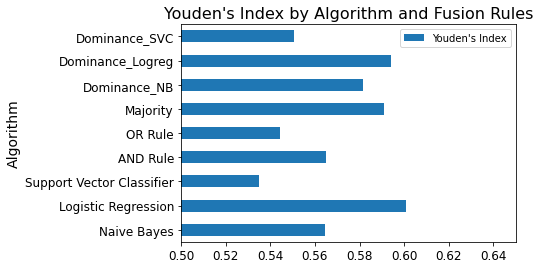

In [ ]:
yi_table.plot.barh(x="Algorithm", y="Youden's Index", fontsize=12)
plt.title("Youden's Index by Algorithm and Fusion Rules", fontdict={'size':16})
plt.xlim(0.5, 0.65)
plt.ylabel('Algorithm', fontdict={'size':14})


Text(0, 0.5, 'Algorithm')

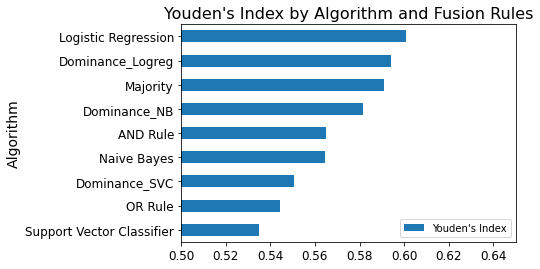

In [ ]:
from natsort import index_natsorted
yi_table_sorted = yi_table.sort_values(
   by="Youden's Index",
   key=lambda x: np.argsort(index_natsorted(yi_table["Youden's Index"]))
)

yi_table_sorted.plot.barh(x="Algorithm", y="Youden's Index", fontsize=12)
plt.title("Youden's Index by Algorithm and Fusion Rules", fontdict={'size':16})
plt.xlim(0.5, 0.65)
plt.ylabel('Algorithm', fontdict={'size':14})

# saving the plot as a .png image
# plt.savefig("v%s accuracy plot.png" %version, orientation='landscape')  # didn't save right

# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html

## Youden point estimate and CI


In [ ]:
# extract youden's index and CI from row 7 and column 1:4

thresohldRoc_table = [thresohldRoc_nb, thresohldRoc_logreg,thresohldRoc_svc,thresohldRoc_and,thresohldRoc_or,thresohldRoc_majority,thresohldRoc_dominance_nb,thresohldRoc_dominance_logreg,thresohldRoc_dominance_svc]
yi_nb, yi_logreg, yi_svc, yi_and, yi_or, yi_majority, yi_dominance_nb, yi_dominance_logreg, yi_dominance_svc = (tt.iloc[7,1:4] for tt in thresohldRoc_table)

# put the YI in an array then in a dataframe 
yi = np.array([yi_nb, yi_logreg, yi_svc, yi_and, yi_or, yi_majority, yi_dominance_nb, yi_dominance_logreg, yi_dominance_svc])
title = ['Naive Bayes', 'Logistic Regression', 'Support Vector Classifier', 'AND Rule', 'OR Rule', 'Majority', 'Dominance_NB', 'Dominance_Logreg', 'Dominance_SVC']
yi_table = pd.DataFrame(title, columns=['Algorithm']).join(pd.DataFrame(yi, columns=['YI estimate', 'YI 95% UB', 'YI 95% LB']))

# # save table to .xlsx
yi_table.to_excel('v%s youden index table.xlsx' % version)
yi_table

,Algorithm,YI estimate,YI 95% UB,YI 95% LB
0,Naive Bayes,0.5647,0.5618,0.5675
1,Logistic Regression,0.6009,0.5981,0.6037
2,Support Vector Classifier,0.5348,0.5319,0.5377
3,AND Rule,0.5652,0.5624,0.568
4,OR Rule,0.5443,0.5415,0.5471
5,Majority,0.5909,0.5881,0.5937
6,Dominance_NB,0.5814,0.5786,0.5842
7,Dominance_Logreg,0.5942,0.5914,0.5969
8,Dominance_SVC,0.5505,0.5477,0.5534


## Load Youden's Index (pt est + CI) table

In [ ]:
# load yi table
yi_table = pd.read_excel('v%s youden index table.xlsx' % version)
# drop first column
yi_table = yi_table.drop(['Unnamed: 0'], axis=1)
yi_table

,Algorithm,YI estimate,YI 95% UB,YI 95% LB
0,Naive Bayes,0.5647,0.5618,0.5675
1,Logistic Regression,0.6009,0.5981,0.6037
2,Support Vector Classifier,0.5348,0.5319,0.5377
3,AND Rule,0.5652,0.5624,0.568
4,OR Rule,0.5443,0.5415,0.5471
5,Majority,0.5909,0.5881,0.5937
6,Dominance_NB,0.5814,0.5786,0.5842
7,Dominance_Logreg,0.5942,0.5914,0.5969
8,Dominance_SVC,0.5505,0.5477,0.5534


## Accuracy estimate and CI from R.  Accuracy table (from sklearn classification reprot) saved in .xlsx earlier WILL BE OVERODE here (using the same file name for the accuracy report generated from R.)


In [ ]:
# extract accuracy and CI from row 8 and column 1:4
thresohldRoc_table = [thresohldRoc_nb, thresohldRoc_logreg,thresohldRoc_svc,thresohldRoc_and,thresohldRoc_or,thresohldRoc_majority,thresohldRoc_dominance_nb,thresohldRoc_dominance_logreg,thresohldRoc_dominance_svc]
acc_nb, acc_logreg, acc_svc, acc_and, acc_or, acc_majority, acc_dominance_nb, acc_dominance_logreg, acc_dominance_svc  = (tt.iloc[8,1:4] for tt in thresohldRoc_table)

# put the YI in an array then in a dataframe 
acc = np.array([acc_nb, acc_logreg, acc_svc, acc_and, acc_or, acc_majority, acc_dominance_nb, acc_dominance_logreg, acc_dominance_svc])
title = ['Naive Bayes', 'Logistic Regression', 'Support Vector Classifier', 'AND Rule', 'OR Rule', 'Majority', 'Dominance_NB', 'Dominance_Logreg', 'Dominance_SVC']
accuracy_table = pd.DataFrame(title, columns=['Algorithm']).join(pd.DataFrame(acc, columns=['Accuracy Estimate', 'Acc 95% UB', 'Acc 95% LB']))

# # save table to .xlsx
accuracy_table.to_excel('v%s accuracy table.xlsx' % version)
accuracy_table

,Algorithm,Accuracy Estimate,Acc 95% UB,Acc 95% LB
0,Naive Bayes,0.7823,0.7809,0.7838
1,Logistic Regression,0.8005,0.7991,0.8018
2,Support Vector Classifier,0.7674,0.7659,0.7689
3,AND Rule,0.7826,0.7812,0.784
4,OR Rule,0.7721,0.7707,0.7736
5,Majority,0.7955,0.7941,0.7968
6,Dominance_NB,0.7907,0.7893,0.7921
7,Dominance_Logreg,0.7971,0.7957,0.7985
8,Dominance_SVC,0.7753,0.7738,0.7767


## Load accuracy (pt est + CI) table

In [ ]:
# load accuracy table
accuracy_table = pd.read_excel('v%s accuracy table.xlsx' % version)
# drop first column
accuracy_table = accuracy_table.drop(['Unnamed: 0'], axis=1)
accuracy_table

,Algorithm,Accuracy Estimate,Acc 95% UB,Acc 95% LB
0,Naive Bayes,0.7823,0.7809,0.7838
1,Logistic Regression,0.8005,0.7991,0.8018
2,Support Vector Classifier,0.7674,0.7659,0.7689
3,AND Rule,0.7826,0.7812,0.784
4,OR Rule,0.7721,0.7707,0.7736
5,Majority,0.7955,0.7941,0.7968
6,Dominance_NB,0.7907,0.7893,0.7921
7,Dominance_Logreg,0.7971,0.7957,0.7985
8,Dominance_SVC,0.7753,0.7738,0.7767


# Load tables: accuracy table, confusion matrix table, Youden's Index table

In [ ]:
# load accuracy table
accuracy_table = pd.read_excel('v%s accuracy table.xlsx' % version)
# drop first column
accuracy_table = accuracy_table.drop(['Unnamed: 0'], axis=1)

# load confusion matrix table
cm = pd.read_excel('confusion matrix table.xlsx')

# load yi table
yi_table = pd.read_excel('v%s youden index table.xlsx' % version)
# # drop first column
yi_table = yi_table.drop(['Unnamed: 0'], axis=1)


In [ ]:
accuracy_table

,Algorithm,Accuracy Estimate,Acc 95% UB,Acc 95% LB
0,Naive Bayes,0.7823,0.7809,0.7838
1,Logistic Regression,0.8005,0.7991,0.8018
2,Support Vector Classifier,0.7674,0.7659,0.7689
3,AND Rule,0.7826,0.7812,0.7840
4,OR Rule,0.7721,0.7707,0.7736
5,Majority,0.7955,0.7941,0.7968
6,Dominance_NB,0.7907,0.7893,0.7921
7,Dominance_Logreg,0.7971,0.7957,0.7985
8,Dominance_SVC,0.7753,0.7738,0.7767


In [ ]:
cm

,Unnamed: 0,tp,fp,fn,tn
0,Naive Bayes,122396,32048,37604,127952
1,Logistic Regression,130111,33965,29889,126035
2,Support Vector Classifier,127168,41599,32832,118401
3,AND Rule,111733,21298,48267,138702
4,OR Rule,139943,52860,20057,107140
5,Majority,127999,33454,32001,126546
6,Dominance_NB,130342,37318,29658,122682
7,Dominance_Logreg,132340,37275,27660,122725
8,Dominance_SVC,133259,45175,26741,114825


In [ ]:
yi_table

,Algorithm,YI estimate,YI 95% UB,YI 95% LB
0,Naive Bayes,0.5647,0.5618,0.5675
1,Logistic Regression,0.6009,0.5981,0.6037
2,Support Vector Classifier,0.5348,0.5319,0.5377
3,AND Rule,0.5652,0.5624,0.5680
4,OR Rule,0.5443,0.5415,0.5471
5,Majority,0.5909,0.5881,0.5937
6,Dominance_NB,0.5814,0.5786,0.5842
7,Dominance_Logreg,0.5942,0.5914,0.5969
8,Dominance_SVC,0.5505,0.5477,0.5534


# **LOAD RESULT TABLE**

In [ ]:
# result_table = accuracy_table.join(yi_table.drop(['Algorithm'], axis=1)).join(cm.drop(['Unnamed: 0'], axis=1))
# # save table to .xlsx
# result_table.to_excel('v%s result table.xlsx' % version)

# load table
result_table = pd.read_excel('v%s result table.xlsx' % version)
# drop first column
result_table = result_table.drop(['Unnamed: 0'], axis=1)
result_table

,Algorithm,Accuracy Estimate,Acc 95% UB,Acc 95% LB,YI estimate,YI 95% UB,YI 95% LB,tp,fp,fn,tn
0,Naive Bayes,0.7823,0.7809,0.7838,0.5647,0.5618,0.5675,122396,32048,37604,127952
1,Logistic Regression,0.8005,0.7991,0.8018,0.6009,0.5981,0.6037,130111,33965,29889,126035
2,Support Vector Classifier,0.7674,0.7659,0.7689,0.5348,0.5319,0.5377,127168,41599,32832,118401
3,AND Rule,0.7826,0.7812,0.7840,0.5652,0.5624,0.5680,111733,21298,48267,138702
4,OR Rule,0.7721,0.7707,0.7736,0.5443,0.5415,0.5471,139943,52860,20057,107140
5,Majority,0.7955,0.7941,0.7968,0.5909,0.5881,0.5937,127999,33454,32001,126546
6,Dominance_NB,0.7907,0.7893,0.7921,0.5814,0.5786,0.5842,130342,37318,29658,122682
7,Dominance_Logreg,0.7971,0.7957,0.7985,0.5942,0.5914,0.5969,132340,37275,27660,122725
8,Dominance_SVC,0.7753,0.7738,0.7767,0.5505,0.5477,0.5534,133259,45175,26741,114825
